<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/no_linear_datalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

#Avto

1) mpg: avtomobil erishgan gallon uchun mil.

2) cylinders: avtomobil dvigatelidagi silindrlar soni (4, 6 yoki 8).

3) displacement: dvigatel hajmi (kub dyuymlarda) yoki dvigatelning o'lchami.

4) horsepower: dvigatel tomonidan ishlab chiqarilgan ot kuchi.

5) weight: avtomobilning og'irligi (funtlarda).

6) acceleration: avtomobilning soatiga 0 dan 60 milyagacha tezlashishi uchun ketadigan vaqt (sekundlarda).

7) model year: avtomobil modeli ishlab chiqarilgan yil (19yy formatida).

8) origin: avtomobil modelining kelib chiqishini ko'rsatuvchi sanab o'tilgan qiymat (1: Amerika, 2: Yevropa, 3: Yapon).

9) car name: avtomobil modeli nomini o'z ichiga olgan qator.

In [6]:
!wget https://raw.githubusercontent.com/JavohirJalilov/Datasets/main/Regression/auto-mpg.csv

--2023-06-20 09:25:29--  https://raw.githubusercontent.com/JavohirJalilov/Datasets/main/Regression/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14978 (15K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  14.63K  --.-KB/s    in 0s      

2023-06-20 09:25:29 (104 MB/s) - ‘auto-mpg.csv’ saved [14978/14978]



In [7]:
data=pd.read_csv("auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [8]:
data=np.array(data)
x=data[:,1:]
y=data[:,0]

In [9]:
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)

In [10]:
class Net(torch.nn.Module):
  def __init__(self, in_feature, out_feature):
    super().__init__()
    self.fc1 = torch.nn.Linear(in_feature,64)
    self.fc2 = torch.nn.Linear(64,16)
    self.fc3 = torch.nn.Linear(16,8)
    self.fc4 = torch.nn.Linear(8,out_feature)
    self.af = torch.nn.ReLU()

  def forward(self,x):
    x = self.af(self.fc1(x))
    x = self.af(self.fc2(x))
    x = self.af(self.fc3(x))

    out = self.fc4(x)
    return out

In [11]:
model=Net(7,1)

In [12]:
criterion=torch.nn.MSELoss()
l=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=l)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
loss_history = {"train":[], "validation": []}

In [15]:
def validation(model, criterion, loss_history, epoch):
  val = model(x_test)
  val_loss = criterion(val, y_test)
  loss_history['validation'].append(val_loss.item())

  return val_loss.item()

In [16]:
def train(model, criterion, optimizer, loss_history, epoch):
  optimizer.zero_grad()
  y_hat = model(x_train)

  loss = criterion(y_hat, y_train)

  loss.backward()
  loss_history['train'].append(loss.item())
  optimizer.step()

  return loss.item()

In [17]:
epochs = 300

for epoch in range(epochs):
  loss = train(model, criterion, optimizer, loss_history, epoch)
  val_loss = validation(model, criterion, loss_history, epoch)

  if epoch%20 == 0:

    print(f"EPOCH: {epoch} \t TRAIN_LOSS: {loss:.3f}  \t  VAL_LOSS: {val_loss:.3f}")



EPOCH: 0 	 TRAIN_LOSS: 1478.743  	  VAL_LOSS: 1405.884
EPOCH: 20 	 TRAIN_LOSS: 181.613  	  VAL_LOSS: 173.656
EPOCH: 40 	 TRAIN_LOSS: 180.643  	  VAL_LOSS: 165.175
EPOCH: 60 	 TRAIN_LOSS: 170.890  	  VAL_LOSS: 154.071
EPOCH: 80 	 TRAIN_LOSS: 162.686  	  VAL_LOSS: 146.179
EPOCH: 100 	 TRAIN_LOSS: 145.537  	  VAL_LOSS: 128.011
EPOCH: 120 	 TRAIN_LOSS: 102.316  	  VAL_LOSS: 84.259
EPOCH: 140 	 TRAIN_LOSS: 43.428  	  VAL_LOSS: 38.686
EPOCH: 160 	 TRAIN_LOSS: 32.937  	  VAL_LOSS: 32.320
EPOCH: 180 	 TRAIN_LOSS: 27.583  	  VAL_LOSS: 27.696
EPOCH: 200 	 TRAIN_LOSS: 23.181  	  VAL_LOSS: 23.837
EPOCH: 220 	 TRAIN_LOSS: 19.611  	  VAL_LOSS: 20.279
EPOCH: 240 	 TRAIN_LOSS: 16.779  	  VAL_LOSS: 17.461
EPOCH: 260 	 TRAIN_LOSS: 14.558  	  VAL_LOSS: 15.026
EPOCH: 280 	 TRAIN_LOSS: 13.169  	  VAL_LOSS: 12.330


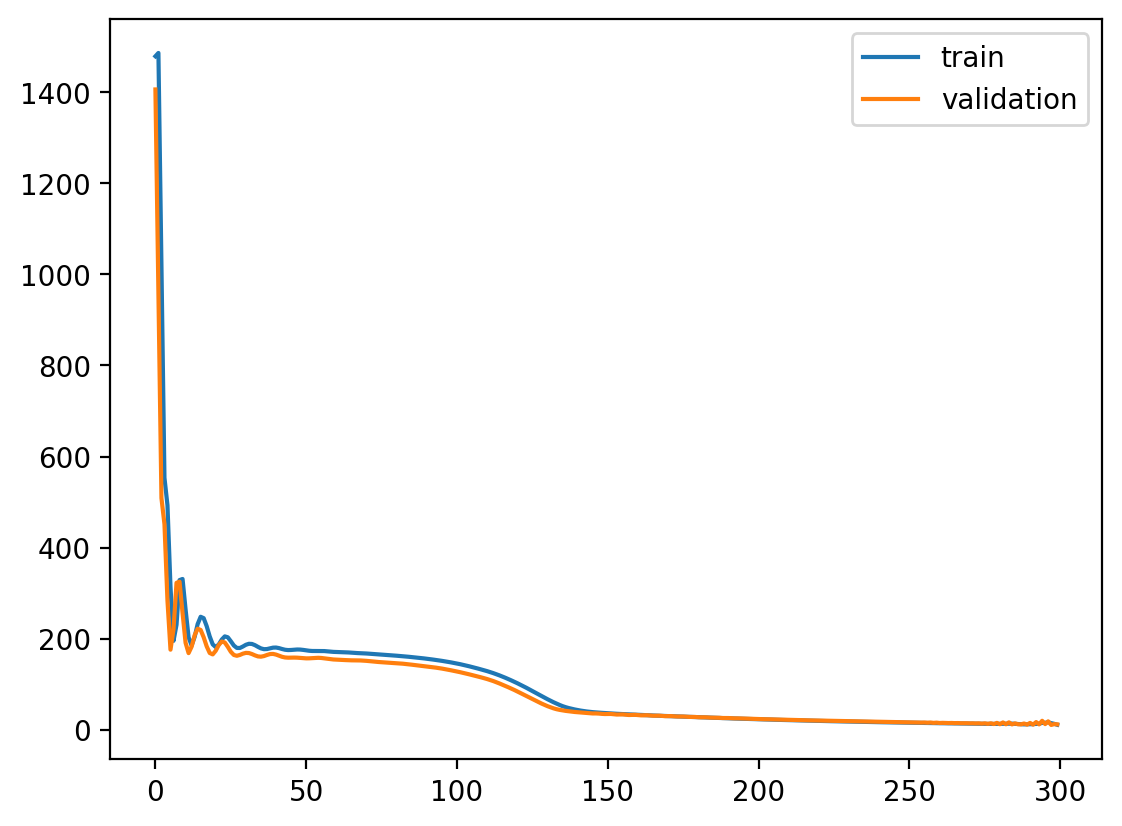

In [18]:
plt.figure(dpi=200)

plt.plot(list(range(epochs)),loss_history['train'], label='train')
plt.plot(list(range(epochs)),loss_history['validation'], label='validation')
plt.legend()
plt.show()

#wine_quality

1) fixed acidity: 1 litr sharobda uchuvchan bo'lmagan (tez bug'lanib ketmaydigan) kislotalar miqdori. Bu kislotalar asosan sharobda mustahkamlanadi, ya'ni ular fermentatsiya yoki boshqa jarayonlar bilan turli birikmalarga aylantirilmaydi.

2) volatile acidity: 1 litr sharobdagi sirka kislotasi (sirkaga o'xshash hid) va boshqa uchuvchi kislotalarning miqdori. Ushbu kislotalar asosan fermentatsiya paytida hosil bo'ladi va sharobning ta'mi va hidiga hissa qo'shishi mumkin.

3) citric acid: 1 litr sharobda limon kislotasi miqdori (tsitrus mevalarida mavjud). Bu kislota odatda sharobga ta'mga qo'shimcha sifatida qo'shiladi.

4) residual sugar: Fermentatsiya tugagandan keyin 1 litr sharobda qolgan shakar miqdori. Bu sharobning shirinligiga hissa qo'shishi mumkin.

5) chlorides: 1 litr sharobdagi tuzga o'xshash moddalarning grammdagi miqdori. Bu sharobning ta'mi va og'ziga ta'sir qilishi mumkin.

6) free sulfur dioxide: Boshqa birikmalar bilan bog'lanmagan konservant sifatida vinoga qo'shilgan oltingugurt dioksidi (SO2) miqdori. Bu sharobni mikroorganizmlardan va oksidlanishdan himoya qilishi mumkin.

7) total sulfur dioxide: 1 litr sharobdagi SO2 ning umumiy miqdori, shu jumladan erkin va bog'langan shakllar.

8) density: 1 litr sharobning zichligi. Bu sharobning alkogol tarkibini ko'rsatishi mumkin.

9) pH: 1 litr vinoning kislotaligi yoki ishqoriyligi, 0 dan 14 gacha bo'lgan shkalada. Pastroq pH qiymatlari yuqori kislotalikni ko'rsatadi.

10) sulphates: 1 litr vinodagi sulfatlar (SO4) miqdori. Bu mikroblarga qarshi vosita va antioksidant sifatida harakat qilishi mumkin.

11) alcohol: 1 litr sharobdagi spirtning miqdori bo'yicha foiz.

12) quality bu ustunda sifatni bildiradi bu ustunga qarab biz taxmin qila olamiz

In [44]:
data=pd.read_csv("/content/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [45]:
data=np.array(data)

In [46]:
x = data[:, :-1]
y = data[:, -1]

In [47]:
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)

In [48]:
class Net(torch.nn.Module):
  def __init__(self, in_feature, out_feature):
    super().__init__()
    self.fc1 = torch.nn.Linear(in_feature,64)
    self.fc2 = torch.nn.Linear(64,16)
    self.fc3 = torch.nn.Linear(16,8)
    self.fc4 = torch.nn.Linear(8,out_feature)
    self.af = torch.nn.ReLU()

  def forward(self,x):
    x = self.af(self.fc1(x))
    x = self.af(self.fc2(x))
    x = self.af(self.fc3(x))

    out = self.fc4(x)
    return out

In [49]:
model=Net(11,1)

In [50]:
criterion=torch.nn.MSELoss()
l=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=l)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
loss_history={"train": [],"validation" : []}

In [53]:
def validation(model,criterion,loss_history,epoch):
  val=model(x_test)
  val_loss=criterion(val,y_test)
  loss_history["validation"].append(val_loss.item())
  return val_loss.item()

In [54]:
def train(model,criterion,optimizer,loss_history,epoch):
  optimizer.zero_grad()
  y_hat=model(x_train)
  loss=criterion(y_hat,y_train)
  loss.backward()
  loss_history["train"].append(loss.item())
  optimizer.step()
  return loss.item()

In [55]:
epoch=300
for epoch in range(epoch):
  loss=train(model,criterion,optimizer,loss_history,epoch)
  val_loss=validation(model,criterion,loss_history,epoch)
  if epoch%20==0:
    print(f"EPOCH: {epoch} \t TRAIN_LOSS: {loss:.3f}  \t  VAL_LOSS: {val_loss:.3f}")

EPOCH: 0 	 TRAIN_LOSS: 30.810  	  VAL_LOSS: 22.492
EPOCH: 20 	 TRAIN_LOSS: 1.338  	  VAL_LOSS: 1.220
EPOCH: 40 	 TRAIN_LOSS: 0.673  	  VAL_LOSS: 0.673
EPOCH: 60 	 TRAIN_LOSS: 0.587  	  VAL_LOSS: 0.572
EPOCH: 80 	 TRAIN_LOSS: 0.547  	  VAL_LOSS: 0.542
EPOCH: 100 	 TRAIN_LOSS: 0.524  	  VAL_LOSS: 0.520
EPOCH: 120 	 TRAIN_LOSS: 0.507  	  VAL_LOSS: 0.504
EPOCH: 140 	 TRAIN_LOSS: 0.493  	  VAL_LOSS: 0.490
EPOCH: 160 	 TRAIN_LOSS: 0.482  	  VAL_LOSS: 0.478
EPOCH: 180 	 TRAIN_LOSS: 0.473  	  VAL_LOSS: 0.468
EPOCH: 200 	 TRAIN_LOSS: 0.466  	  VAL_LOSS: 0.459
EPOCH: 220 	 TRAIN_LOSS: 0.460  	  VAL_LOSS: 0.451
EPOCH: 240 	 TRAIN_LOSS: 0.455  	  VAL_LOSS: 0.444
EPOCH: 260 	 TRAIN_LOSS: 0.450  	  VAL_LOSS: 0.438
EPOCH: 280 	 TRAIN_LOSS: 0.447  	  VAL_LOSS: 0.433


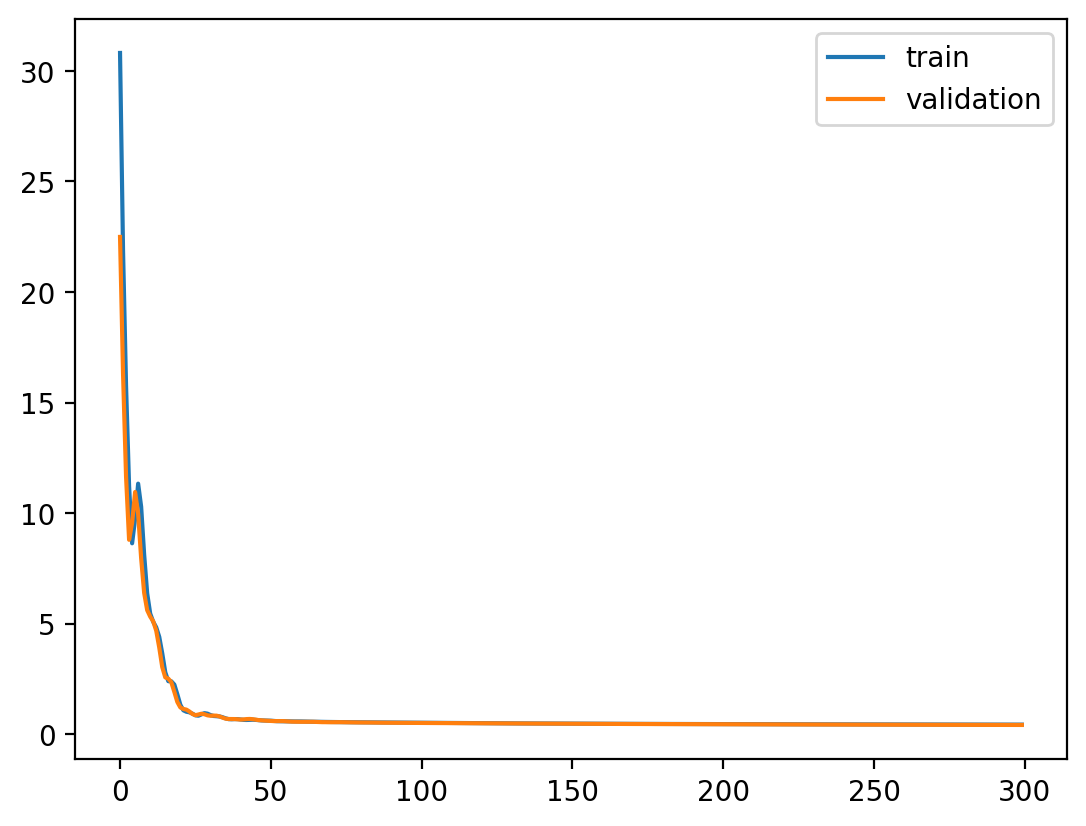

In [56]:
plt.figure(dpi=200)

plt.plot(list(range(epochs)),loss_history['train'], label='train')
plt.plot(list(range(epochs)),loss_history['validation'], label='validation')
plt.legend()
plt.show()

#energy_effiency

X1 Nisbiy ixchamlik

X2 Sirt maydoni

X3 Devor maydoni

X4 Tom maydoni

X5 Umumiy balandlik

X6 Orientatsiya

X7 Oynali maydon

X8 Oynali maydon taqsimoti

y1 Isitish yuki

y2 Sovutish yuki

In [164]:
data=pd.read_csv("/content/ENB2012_data.csv")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [165]:
data = pd.read_csv("/content/ENB2012_data.csv")
data = np.array(data)
x = data[:, :-2]
y = data[:, -2]
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [167]:
x_train = x_train.reshape(-1,8)
x_test = x_test.reshape(-1,8)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [168]:
class Net(torch.nn.Module):
  def __init__(self, in_feature, out_feature):
    super().__init__()
    self.fc1=torch.nn.Linear(in_feature,64)
    self.fc2=torch.nn.Linear(64,16)
    self.fc3=torch.nn.Linear(16,8)
    self.fc4=torch.nn.Linear(8,out_feature)
    self.af = torch.nn.ReLU()
  def forward(self,x):
    x=self.af(self.fc1(x))
    x=self.af(self.fc2(x))
    x=self.af(self.fc3(x))
    out = self.fc4(x)
    return out

In [169]:
model=Net(8,2)

In [170]:
criterion=torch.nn.MSELoss()
l=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=l)

In [171]:
loss_history={"train": [],"validation": []}

In [172]:
def validation(model,criterion,loss_history,epoch):
  val=model(x_test)
  val_loss=criterion(val,y_test)
  loss_history["validation"].append(val_loss.item())
  return val_loss.item()

In [173]:
def train(model, criterion, optimizer, loss_history, epoch):
  optimizer.zero_grad()
  y_hat=model(x_train)
  loss=criterion(y_hat,y_train)
  loss.backward()
  optimizer.step()
  loss_history["train"].append(loss.item())
  return loss.item()


In [174]:
epochs = 1500
for epoch in range(epochs):
  loss = train(model, criterion, optimizer, loss_history, epoch)
  val_loss = validation(model, criterion, loss_history, epoch)
  if epoch%20 == 0:
    print(f"EPOCH: {epoch} \t TRAIN_LOSS: {loss:.3f}  \t  VAL_LOSS: {val_loss:.3f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([537, 1])) that is different to the input size (torch.Size([537, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([231, 1])) that is different to the input size (torch.Size([231, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


EPOCH: 0 	 TRAIN_LOSS: 722.277  	  VAL_LOSS: 486.749
EPOCH: 20 	 TRAIN_LOSS: 127.744  	  VAL_LOSS: 124.777
EPOCH: 40 	 TRAIN_LOSS: 76.236  	  VAL_LOSS: 74.600
EPOCH: 60 	 TRAIN_LOSS: 31.319  	  VAL_LOSS: 30.207
EPOCH: 80 	 TRAIN_LOSS: 26.618  	  VAL_LOSS: 25.445
EPOCH: 100 	 TRAIN_LOSS: 24.420  	  VAL_LOSS: 24.025
EPOCH: 120 	 TRAIN_LOSS: 22.544  	  VAL_LOSS: 22.116
EPOCH: 140 	 TRAIN_LOSS: 20.752  	  VAL_LOSS: 20.461
EPOCH: 160 	 TRAIN_LOSS: 19.122  	  VAL_LOSS: 19.064
EPOCH: 180 	 TRAIN_LOSS: 17.848  	  VAL_LOSS: 18.302
EPOCH: 200 	 TRAIN_LOSS: 16.441  	  VAL_LOSS: 16.970
EPOCH: 220 	 TRAIN_LOSS: 15.661  	  VAL_LOSS: 16.422
EPOCH: 240 	 TRAIN_LOSS: 15.570  	  VAL_LOSS: 15.522
EPOCH: 260 	 TRAIN_LOSS: 14.408  	  VAL_LOSS: 15.319
EPOCH: 280 	 TRAIN_LOSS: 13.951  	  VAL_LOSS: 14.768
EPOCH: 300 	 TRAIN_LOSS: 14.060  	  VAL_LOSS: 14.130
EPOCH: 320 	 TRAIN_LOSS: 14.050  	  VAL_LOSS: 14.533
EPOCH: 340 	 TRAIN_LOSS: 14.271  	  VAL_LOSS: 15.334
EPOCH: 360 	 TRAIN_LOSS: 13.265  	  VAL_LOSS: 13

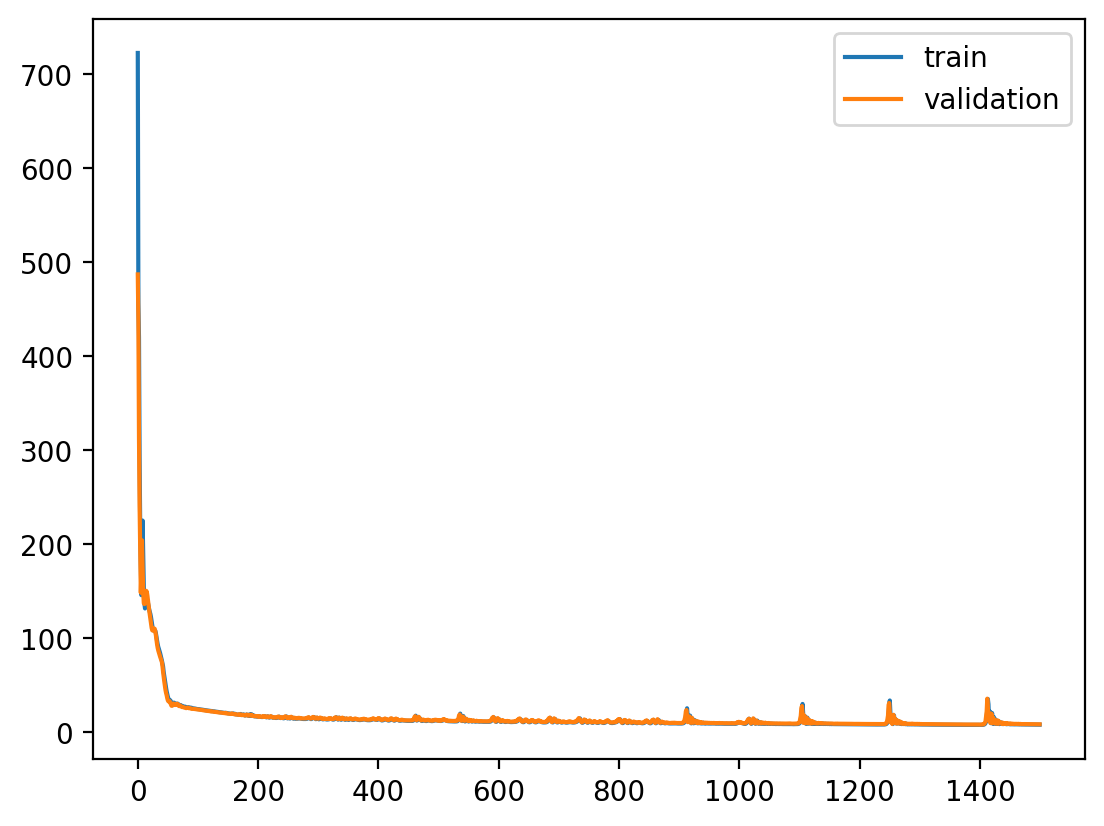

In [175]:
plt.figure(dpi=200)

plt.plot(list(range(epochs)),loss_history['train'], label='train')
plt.plot(list(range(epochs)),loss_history['validation'], label='validation')
plt.legend()
plt.show()